### Name : Ritika Singaravelou
### Github Username : ritika-singaravelou
### USC ID : 6144091011

#### Import required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import math
import warnings
warnings.filterwarnings('ignore')
!pip install tabulate
from tabulate import tabulate


[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 1 (a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column

Get the Vertebral Column Data Set

In [2]:
title = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis", "class"]

vertebral_column_df = pd.read_csv('../../data/vertebral_column_data/column_2C.dat', delimiter = " ", header = None, names = title)

In [3]:
vertebral_column_df.shape

(310, 7)

In [4]:
vertebral_column_df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [5]:
#mapping normal ('NO') to 0 and abnormal ('AB') to 1
vertebral_column_df['class'] = vertebral_column_df['class'].apply(lambda x: 0 if x=="NO" else 1)

In [6]:
vertebral_column_df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


### 1 (b) Pre-Processing and Exploratory Data Analysis

#### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

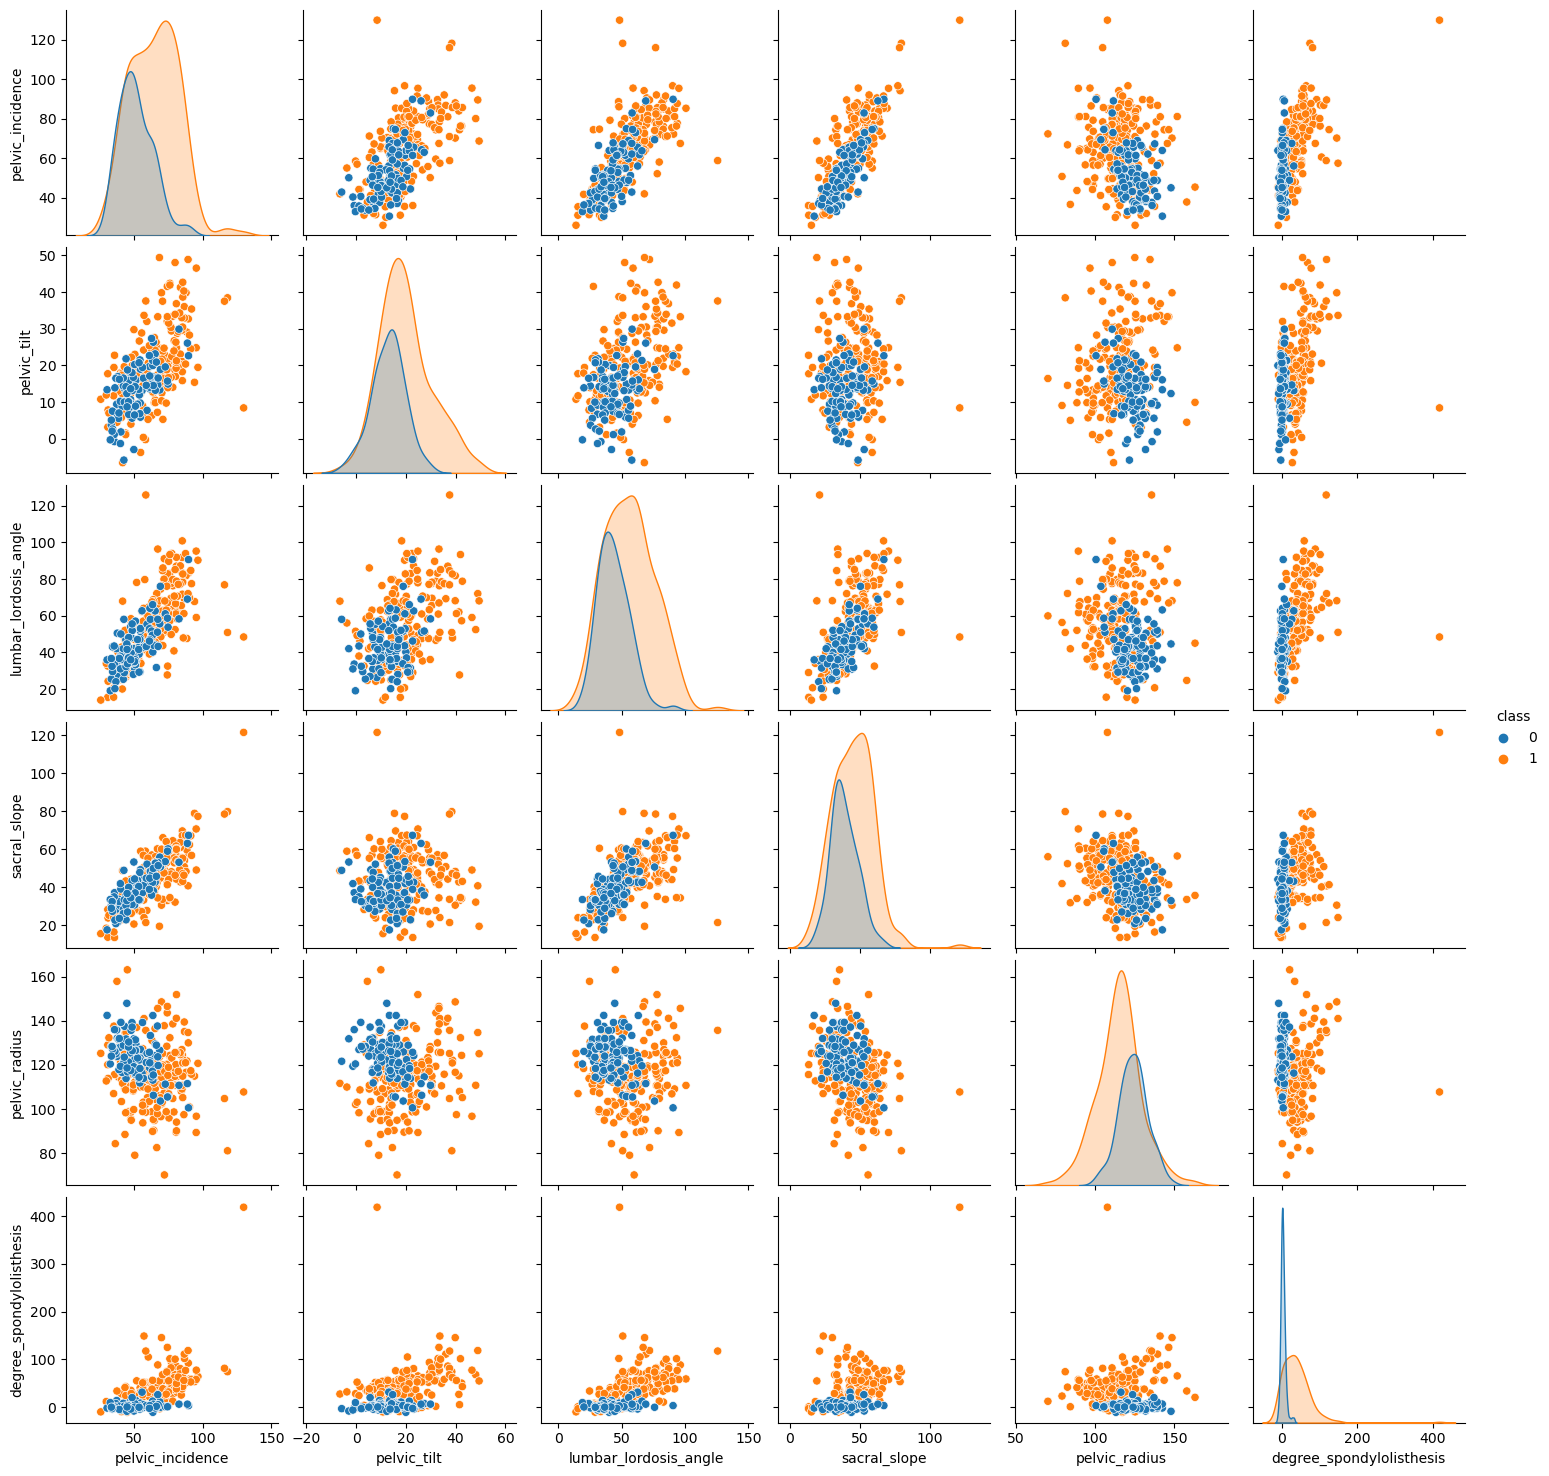

In [7]:
sns.pairplot(vertebral_column_df,hue='class')

##### NOTE: In the above scatterplots. class 0 denotes normal(NO) and class 1 denotes abnormal (AB)

#### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

In [8]:
cols_list=vertebral_column_df.columns
cols_list

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

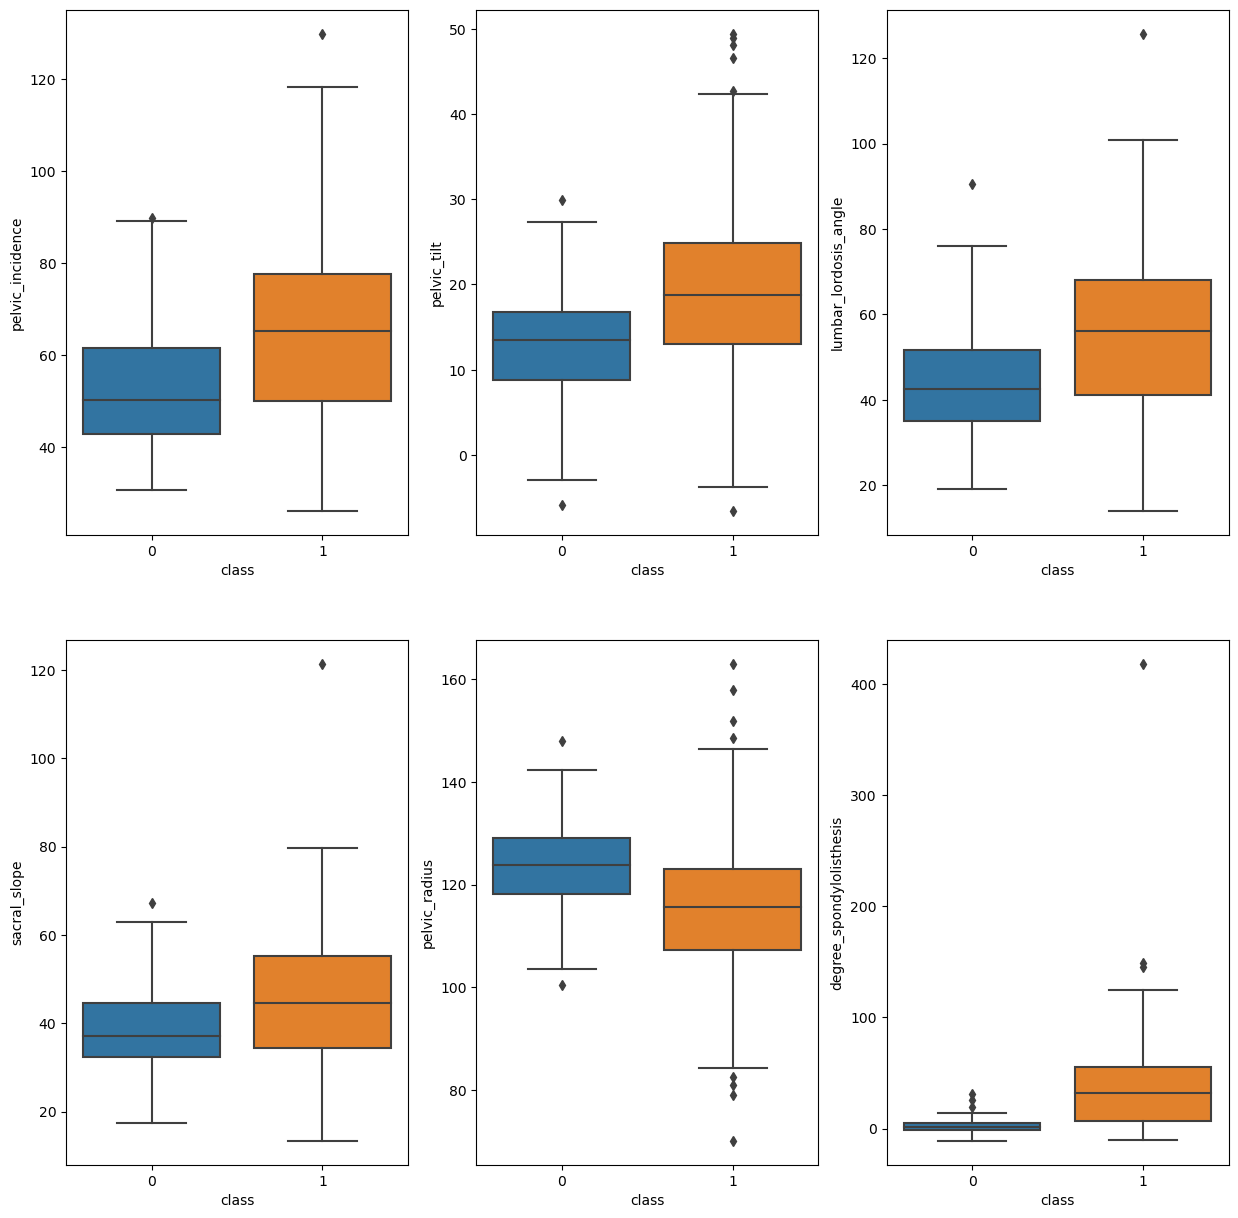

In [9]:
plt.figure(figsize=(15,15))

cols_list=vertebral_column_df.columns
for i in range(len(cols_list)-1):
    plt.subplot(2, 3, i + 1)
    #plt.figure()
    sns.boxplot(data=vertebral_column_df,x='class', y=cols_list[i])
    
    

#### iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [10]:
data_class0=vertebral_column_df.loc[vertebral_column_df['class'] == 0]
data_class1=vertebral_column_df.loc[vertebral_column_df['class'] == 1]


In [11]:
#training data - first 70 of class 0 and first 140 of class 1
train_data_class0=data_class0.iloc[0:70]
train_data_class1=data_class1.iloc[0:140]
train_data=pd.concat([train_data_class0,train_data_class1])
train_data.reset_index(inplace=True, drop=True)

In [12]:
train_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,38.51,16.96,35.11,21.54,127.63,7.99,0
1,54.92,18.97,51.60,35.95,125.85,2.00,0
2,44.36,8.95,46.90,35.42,129.22,4.99,0
3,48.32,17.45,48.00,30.87,128.98,-0.91,0
4,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
205,77.12,30.35,77.48,46.77,110.61,82.09,1
206,88.02,39.84,81.77,48.18,116.60,56.77,1
207,83.40,34.31,78.42,49.09,110.47,49.67,1
208,72.05,24.70,79.87,47.35,107.17,56.43,1


In [13]:
#testing data - class 0 and class 1 not included in training data
test_data_class0=data_class0.iloc[70:]
test_data_class1=data_class1.iloc[140:]
test_data=pd.concat([test_data_class0,test_data_class1])
test_data.reset_index(inplace=True, drop=True)

In [14]:
test_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,50.09,13.43,34.46,36.66,119.13,3.09,0
1,64.26,14.50,43.90,49.76,115.39,5.95,0
2,53.68,13.45,41.58,40.24,113.91,2.74,0
3,49.00,13.11,51.87,35.88,126.40,0.54,0
4,59.17,14.56,43.20,44.60,121.04,2.83,0
...,...,...,...,...,...,...,...
95,80.11,33.94,85.10,46.17,125.59,100.29,1
96,95.48,46.55,59.00,48.93,96.68,77.28,1
97,74.09,18.82,76.03,55.27,128.41,73.39,1
98,87.68,20.37,93.82,67.31,120.94,76.73,1


### 1 (c) Classification using KNN on Vertebral Column Data Set


In [15]:
# get training features and labels
train_features=train_data.iloc[:,0:6].to_numpy() 

train_labels=train_data.iloc[:,-1].to_numpy() #only last column ('class')


In [16]:
print(train_features.shape)
print(train_labels.shape)

(210, 6)
(210,)


In [17]:
# get testing features and labels
test_features=test_data.iloc[:,0:6].to_numpy()

test_labels=test_data.iloc[:,-1].to_numpy()


In [18]:
print(test_features.shape)
print(test_labels.shape)

(100, 6)
(100,)


### i. Write code for k-nearest neighbors with Euclidean metric (or use a software package)

In [19]:
#reference link : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
knn_euclidean_distance = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
print(knn_euclidean_distance.fit(train_features,train_labels))

KNeighborsClassifier(metric='euclidean')


###  ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling.                                                            Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order).                                                                                  You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision,and F1-score when k =k∗


In [20]:
k_values=np.arange(208,0,-3)
k_values.shape


(70,)

In [21]:
k_values

array([208, 205, 202, 199, 196, 193, 190, 187, 184, 181, 178, 175, 172,
       169, 166, 163, 160, 157, 154, 151, 148, 145, 142, 139, 136, 133,
       130, 127, 124, 121, 118, 115, 112, 109, 106, 103, 100,  97,  94,
        91,  88,  85,  82,  79,  76,  73,  70,  67,  64,  61,  58,  55,
        52,  49,  46,  43,  40,  37,  34,  31,  28,  25,  22,  19,  16,
        13,  10,   7,   4,   1])

In [22]:
train_error_euclidean=[]
test_error_euclidean=[]
for i in k_values:
    knn_euclidean_distance = KNeighborsClassifier(n_neighbors=i,metric='euclidean',p=2)
    knn_euclidean_distance.fit(train_features,train_labels)
    
    train_predictions=knn_euclidean_distance.predict(train_features)
    train_error_euclidean.append(np.mean(train_predictions != train_labels))
    
    test_predictions=knn_euclidean_distance.predict(test_features)
    test_error_euclidean.append(np.mean(test_predictions != test_labels))
 

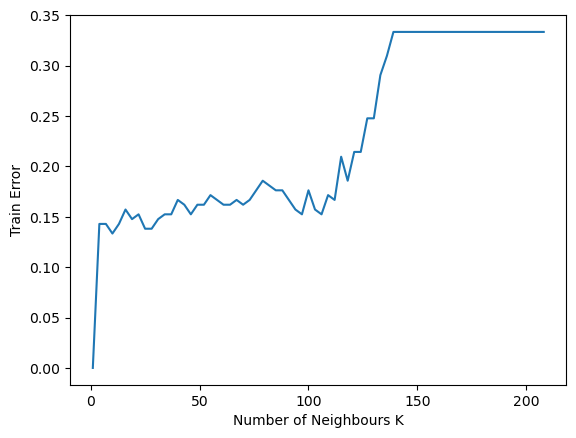

In [23]:
plt.plot(k_values, train_error_euclidean)
plt.xlabel('Number of Neighbours K')
plt.ylabel('Train Error')
plt.show()
    

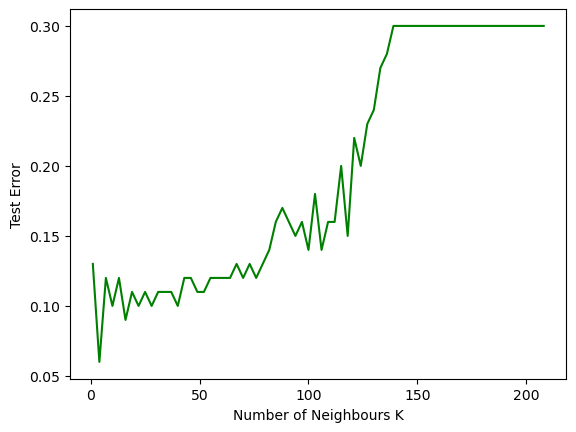

In [24]:
plt.plot(k_values, test_error_euclidean,'g')
plt.xlabel('Number of Neighbours K')
plt.ylabel('Test Error')
plt.show()

    

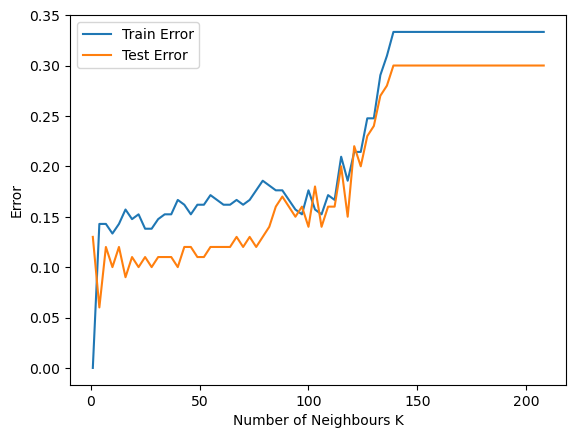

In [25]:
plt.plot(k_values, train_error_euclidean, label="Train Error")
plt.plot(k_values, test_error_euclidean, label="Test Error")
plt.xlabel('Number of Neighbours K')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

In [26]:
#k with lowest test error

best_k_index=test_error_euclidean.index(min(test_error_euclidean))
best_k=k_values[best_k_index]

In [27]:

print("Optimal k = " + str(best_k))
print()
print("Minimum Test Error = " + str(min(test_error_euclidean)))

Optimal k = 4

Minimum Test Error = 0.06


The optimal k (k having lowest correspoding test error) is found to be 4

Hence, confusion matrix, true positive rate, true negative rate, precision, F1-Score are calculated with number of neighbours as 4 and printed below

In [28]:

knn_euclidean_distance = KNeighborsClassifier(n_neighbors=best_k,metric='euclidean',p=2)
knn_euclidean_distance.fit(train_features,train_labels)
   
test_predictions=knn_euclidean_distance.predict(test_features)



In [29]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [30]:
test_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Confusion Matrix


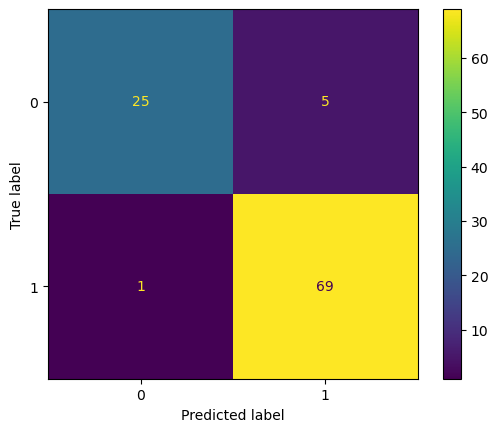

In [31]:
#confusion matrix

print("Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(test_labels,test_predictions)
plt.show()

In [32]:

true_negative, false_positive, false_negative, true_positive = confusion_matrix(test_labels, test_predictions, labels=[0, 1]).ravel()
print(true_negative, false_positive, false_negative, true_positive)

25 5 1 69


In [33]:
#true positive rate for k=4 (true positives/all positives)
true_positive_rate=true_positive/(true_positive+false_negative)
print(true_positive_rate)


0.9857142857142858


In [34]:
#true negative rate for k=4 (true negatives/all negatives)
true_negative_rate=true_negative/(true_negative+false_positive)
print(true_negative_rate)

0.8333333333333334


In [35]:
#precision or positive predictive value for k=4 (correctly predicted postives/all predicted positives)
precision=true_positive/(true_positive+false_positive)
print(precision)

0.9324324324324325


In [36]:
#recall for k=4 (correctly predicted postives/all actual positives)
recall=true_positive/(true_positive+false_negative)
print(recall)

0.9857142857142858


In [37]:
#F1 Score for k=4
f1_score=(2*(precision*recall))/(precision+recall)
print(f1_score)

0.9583333333333333


In [38]:
print("True Positive Rate : "+ str(true_positive_rate))
print("True Negative Rate : "+ str(true_negative_rate))
print("Precision : "+ str(precision))
print("Recall : "+ str(recall))
print("F1 Score :" + str(f1_score))

True Positive Rate : 0.9857142857142858
True Negative Rate : 0.8333333333333334
Precision : 0.9324324324324325
Recall : 0.9857142857142858
F1 Score :0.9583333333333333


### iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}.  Note: for each N, select your training set by choosing the first N/3 rows of Class 0 and the first N − N/3 rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve.

In [39]:
N=np.arange(10,215,10)

train_error_n=[]
test_error_n=[]
best_k_n_train=[]
best_k_n_test=[]

for n in N:
    train_data_class0_subset=data_class0.iloc[0:(n//3)]
    train_data_class1_subset=data_class1.iloc[0:(n-(n//3))]
    train_data_subset=pd.concat([train_data_class0_subset,train_data_class1_subset])
    train_data_subset.reset_index(inplace=True, drop=True)
    train_features=train_data_subset.iloc[:,0:6].to_numpy()
    train_labels=train_data_subset.iloc[:,-1].to_numpy()
    k_values=np.arange(1,n,5)
    
    train_error=[]
    test_error=[]
    for k in k_values:
        knn_euclidean_distance = KNeighborsClassifier(n_neighbors=k,metric='euclidean',p=2)
        knn_euclidean_distance.fit(train_features,train_labels)
        
        train_predictions=knn_euclidean_distance.predict(train_features)
        train_error.append(np.mean(train_predictions != train_labels))
    
        test_predictions=knn_euclidean_distance.predict(test_features)
        test_error.append(np.mean(test_predictions != test_labels))
    
    train_error_n.append(min(train_error))
    best_k_index=train_error.index(min(train_error))
    best_k_n_train.append(k_values[best_k_index])
    
    test_error_n.append(min(test_error))
    best_k_index=test_error.index(min(test_error))
    best_k_n_test.append(k_values[best_k_index])
        
    
    
    

### Learning Curve 

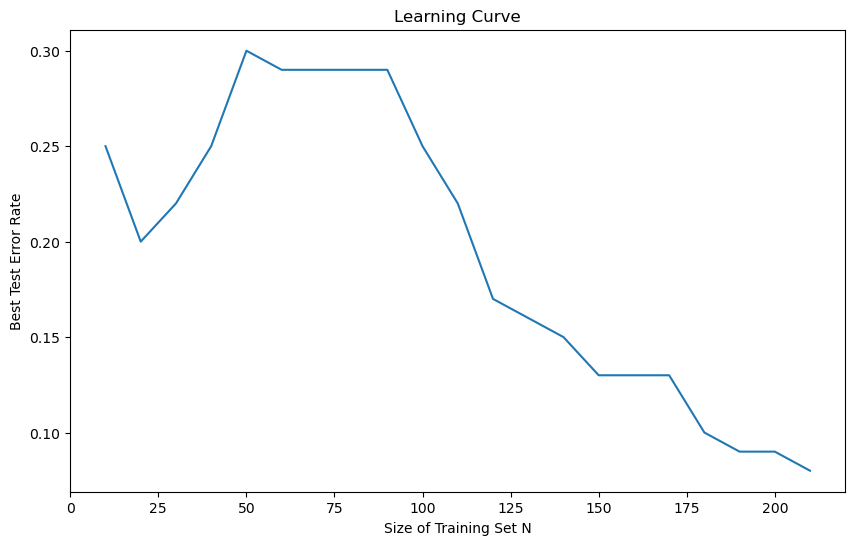

In [40]:
#Learning Curve - N vs lowest test error amongst all k for that N
#plt.plot(N, train_error_n, label="Best Train Error")

plt.figure(figsize=(10, 6))
plt.title('Learning Curve')
plt.plot(N, test_error_n)
plt.xlabel('Size of Training Set N')
plt.ylabel('Best Test Error Rate')
plt.show()

### (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.

In [41]:
train_data.shape #all training data taken into consideration

(210, 7)

In [42]:
#getting train features and labels, test features and labels

train_features=train_data.iloc[:,0:6].to_numpy()

train_features_mah=train_data.iloc[:,0:6]

train_labels=train_data.iloc[:,-1].to_numpy()

test_features=test_data.iloc[:,0:6].to_numpy()

test_labels=test_data.iloc[:,-1].to_numpy()


In [43]:
k_values=np.arange(1,197,5)
k_values

array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
       196])

### i. Minkowski Distance.

### A. which becomes Manhattan Distance with p = 1.


In [44]:
k_values=np.arange(1,197,5)
train_error_manhattan=[]
test_error_manhattan=[]
for i in k_values:
    knn_manhattan_distance = KNeighborsClassifier(n_neighbors=i,metric='manhattan')
    knn_manhattan_distance.fit(train_features,train_labels)
    
    train_predictions=knn_manhattan_distance.predict(train_features)
    train_error_manhattan.append(np.mean(train_predictions != train_labels))
    
    test_predictions=knn_manhattan_distance.predict(test_features)
    test_error_manhattan.append(np.mean(test_predictions != test_labels))

In [45]:
min_test_error_manhattan=min(test_error_manhattan)
print(min_test_error_manhattan)
test_error_manhattan.count(min_test_error_manhattan) #to check if there are multiple values of k with the same minimum test error

0.11


3

In [46]:

optimal_k_manhattan=[]
for i in range(len(k_values)):
    if test_error_manhattan[i]==min_test_error_manhattan and k_values[i]>1:
        optimal_k_manhattan.append(k_values[i])
optimal_k_manhattan   

optimal_test_error_manhattan=[min_test_error_manhattan]*len(optimal_k_manhattan)

In [47]:
df_manhattan = pd.DataFrame({'Optimal k' : optimal_k_manhattan  ,
                   'Test Error' : optimal_test_error_manhattan})
print("For Manhattan Distance")
print(tabulate(df_manhattan, headers='keys', tablefmt='grid',showindex=False))

For Manhattan Distance
+-------------+--------------+
|   Optimal k |   Test Error |
+=============+==============+
|           6 |         0.11 |
+-------------+--------------+
|          11 |         0.11 |
+-------------+--------------+
|          26 |         0.11 |
+-------------+--------------+


Three k values, namely 6, 11 and 26, provide the minimum test error (=0.11)

The lowest among these is 6. 

Hence, it is chosen as the optimal k (k* = 6) and used in the subsequent section 1 (d)i B

### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.  In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

 Optimal k found for the Manhattan distance in 1(d)iA = k* = 6

In [48]:
# log p base 10 = 0.1 ---> p = 10 to the power 0.1
p_values=[]
for log_p in np.linspace(0.1,1,10):
    p_values.append(10**log_p)
p_values



[1.2589254117941673,
 1.5848931924611136,
 1.9952623149688797,
 2.51188643150958,
 3.1622776601683795,
 3.9810717055349722,
 5.011872336272724,
 6.309573444801933,
 7.943282347242816,
 10.0]

In [49]:
train_error_minkowski=[]
test_error_minkowski=[]

for pval in p_values:
    
    knn_minkowski_distance = KNeighborsClassifier(n_neighbors=6,p=pval,metric='minkowski')
    knn_minkowski_distance.fit(train_features,train_labels)
    
    train_predictions=knn_minkowski_distance.predict(train_features)
    train_error_minkowski.append(np.mean(train_predictions != train_labels))
    
    test_predictions=knn_minkowski_distance.predict(test_features)
    test_error_minkowski.append(np.mean(test_predictions != test_labels))
    

In [50]:
test_error_minkowski

[0.09, 0.09, 0.08, 0.08, 0.08, 0.06, 0.07, 0.08, 0.09, 0.09]

In [51]:
df = pd.DataFrame({ 'p': list(np.round(p_values,4)),
                    'log(p)' : list(np.linspace(0.1,1,10)),
                   'Test Error' : list(test_error_minkowski)})

print(tabulate(df, headers='keys', tablefmt='grid',showindex=False))

+---------+----------+--------------+
|       p |   log(p) |   Test Error |
+=========+==========+==============+
|  1.2589 |      0.1 |         0.09 |
+---------+----------+--------------+
|  1.5849 |      0.2 |         0.09 |
+---------+----------+--------------+
|  1.9953 |      0.3 |         0.08 |
+---------+----------+--------------+
|  2.5119 |      0.4 |         0.08 |
+---------+----------+--------------+
|  3.1623 |      0.5 |         0.08 |
+---------+----------+--------------+
|  3.9811 |      0.6 |         0.06 |
+---------+----------+--------------+
|  5.0119 |      0.7 |         0.07 |
+---------+----------+--------------+
|  6.3096 |      0.8 |         0.08 |
+---------+----------+--------------+
|  7.9433 |      0.9 |         0.09 |
+---------+----------+--------------+
| 10      |      1   |         0.09 |
+---------+----------+--------------+


In [52]:
min_test_error_minkowski=min(test_error_minkowski)
print(min_test_error_minkowski)
test_error_minkowski.count(min_test_error_minkowski)  #to check if there are multiple values of p with the same minimum test error

0.06


1

In [53]:
best_p=p_values[test_error_minkowski.index(min_test_error_minkowski)]
best_log_p=math.log(best_p,10)
print(best_log_p)

0.6


In [54]:
# log (p) has base 10
df = pd.DataFrame({'Best log(p)' :  [best_log_p],
                   'Test Error' : [min_test_error_minkowski]})

print(tabulate(df, headers='keys', tablefmt='grid',showindex=False))

+---------------+--------------+
|   Best log(p) |   Test Error |
+===============+==============+
|           0.6 |         0.06 |
+---------------+--------------+


The Best log (p) is found to be 0.6 and its corresponding test error is 0.06

### C. which becomes Chebyshev Distance with p -> infinity.

In [55]:
k_values=np.arange(1,197,5)
train_error_chebyshev=[]
test_error_chebyshev=[]
for i in k_values:
    knn_chebyshev_distance = KNeighborsClassifier(n_neighbors=i,p=float('inf'),metric='chebyshev')
    knn_chebyshev_distance.fit(train_features,train_labels)
    
    train_predictions=knn_chebyshev_distance.predict(train_features)
    train_error_chebyshev.append(np.mean(train_predictions != train_labels))
    
    test_predictions=knn_chebyshev_distance.predict(test_features)
    test_error_chebyshev.append(np.mean(test_predictions != test_labels))

In [56]:
min_test_error_chebyshev=min(test_error_chebyshev)
print(min_test_error_chebyshev)

test_error_chebyshev.count(min_test_error_chebyshev) #to check if there are multiple values of k with the same minimum test error

0.08


1

In [57]:

optimal_k_chebyshev=[k_values[test_error_chebyshev.index(min_test_error_chebyshev)]]

optimal_test_error_chebyshev=[min_test_error_chebyshev]


In [58]:
head = ["Optimal k", "Test Error"]


df_chebyshev = pd.DataFrame({'Optimal k' : optimal_k_chebyshev  ,
                   'Test Error' : optimal_test_error_chebyshev})

print("For Chebyshev Distance")
print(tabulate(df_chebyshev, headers='keys', tablefmt='grid',showindex=False))

For Chebyshev Distance
+-------------+--------------+
|   Optimal k |   Test Error |
+=============+==============+
|          16 |         0.08 |
+-------------+--------------+


### ii. Mahalanobis Distance.

In [59]:
k_values=np.arange(1,197,5)
train_error_mahalanobis=[]
test_error_mahalanobis=[]


for i in k_values:
    knn_mahalanobis_distance = KNeighborsClassifier(n_neighbors=i,metric='mahalanobis',metric_params={
                'VI': np.linalg.pinv(train_features_mah.cov())
             })
    knn_mahalanobis_distance.fit(train_features,train_labels)
    
    train_predictions=knn_mahalanobis_distance.predict(train_features)
    train_error_mahalanobis.append(np.mean(train_predictions != train_labels))
    
    test_predictions=knn_mahalanobis_distance.predict(test_features)
    test_error_mahalanobis.append(np.mean(test_predictions != test_labels))

In [60]:
min_test_error_mahalanobis=min(test_error_mahalanobis)
print(min_test_error_mahalanobis)
test_error_mahalanobis.count(min_test_error_mahalanobis) #to check if there are multiple values of k with the same minimum test error

0.17


2

In [61]:

optimal_k_mahalanobis=[]
for i in range(len(k_values)):
    if test_error_mahalanobis[i]==min_test_error_mahalanobis:
        optimal_k_mahalanobis.append(k_values[i])
optimal_k_mahalanobis   

optimal_test_error_mahalanobis=[min_test_error_mahalanobis]*len(optimal_k_mahalanobis)

In [62]:
head = ["Optimal k", "Test Error"]


df_mahalanobis = pd.DataFrame({'Optimal k' : optimal_k_mahalanobis  ,
                   'Test Error' : optimal_test_error_mahalanobis})
print("For Mahalanobis Distance")
print(tabulate(df_mahalanobis, headers='keys', tablefmt='grid',showindex=False))

For Mahalanobis Distance
+-------------+--------------+
|   Optimal k |   Test Error |
+=============+==============+
|           1 |         0.17 |
+-------------+--------------+
|           6 |         0.17 |
+-------------+--------------+


### Summary of Results (Optimal k, Corresponding Test Error) obtained with Manhattan, Chebyshev and Mahalanobis distances (using majority polling)

In [63]:
head = ["k", "Test Error"]

print("Manhattan  Distance")
print(tabulate(df_manhattan, headers=head, tablefmt='grid',showindex=False))
print()
print("Chebyshev  Distance")
print(tabulate(df_chebyshev, headers=head, tablefmt='grid',showindex=False))
print()
print("Mahalanobis  Distance")
print(tabulate(df_mahalanobis , headers=head, tablefmt='grid',showindex=False))

Manhattan  Distance
+-----+--------------+
|   k |   Test Error |
+=====+==============+
|   6 |         0.11 |
+-----+--------------+
|  11 |         0.11 |
+-----+--------------+
|  26 |         0.11 |
+-----+--------------+

Chebyshev  Distance
+-----+--------------+
|   k |   Test Error |
+=====+==============+
|  16 |         0.08 |
+-----+--------------+

Mahalanobis  Distance
+-----+--------------+
|   k |   Test Error |
+=====+==============+
|   1 |         0.17 |
+-----+--------------+
|   6 |         0.17 |
+-----+--------------+


### (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.


### Weighted Voting with Euclidean Distance

In [64]:
train_error_euclidean_weighted=[]
test_error_euclidean_weighted=[]
for i in k_values:
    knn_euclidean_distance = KNeighborsClassifier(n_neighbors=i,metric='euclidean',p=2, weights='distance')
    knn_euclidean_distance.fit(train_features,train_labels)
    
    train_predictions=knn_euclidean_distance.predict(train_features)
    train_error_euclidean_weighted.append(np.mean(train_predictions != train_labels))
    
    test_predictions=knn_euclidean_distance.predict(test_features)
    test_error_euclidean_weighted.append(np.mean(test_predictions != test_labels))
    

In [65]:
min_test_error_euclidean_weighted=min(test_error_euclidean_weighted)
print(min_test_error_euclidean_weighted)
test_error_euclidean_weighted.count(min_test_error_euclidean_weighted)

0.1


1

In [66]:
optimal_k_euclidean_weighted=[k_values[test_error_euclidean_weighted.index(min_test_error_euclidean_weighted)]]

optimal_test_error_euclidean_weighted=[min_test_error_euclidean_weighted]

In [67]:
head = ["Optimal k", "Test Error"]


df_euclidean_weighted = pd.DataFrame({'Optimal k' : optimal_k_euclidean_weighted  ,
                   'Test Error' : optimal_test_error_euclidean_weighted})
print("Weighted Voting with Euclidean Distance")
print(tabulate(df_euclidean_weighted, headers='keys', tablefmt='grid',showindex=False))

Weighted Voting with Euclidean Distance
+-------------+--------------+
|   Optimal k |   Test Error |
+=============+==============+
|           6 |          0.1 |
+-------------+--------------+


### Weighted Voting with Manhattan Distance

In [68]:
train_error_manhattan_weighted=[]
test_error_manhattan_weighted=[]
for i in k_values:
    knn_manhattan_distance = KNeighborsClassifier(n_neighbors=i,metric='manhattan',p=1, weights='distance')
    knn_manhattan_distance.fit(train_features,train_labels)
    
    train_predictions=knn_manhattan_distance.predict(train_features)
    train_error_manhattan_weighted.append(np.mean(train_predictions != train_labels))
    
    test_predictions=knn_manhattan_distance.predict(test_features)
    test_error_manhattan_weighted.append(np.mean(test_predictions != test_labels))

In [69]:
min_test_error_manhattan_weighted=min(test_error_manhattan_weighted)
print(min_test_error_manhattan_weighted)
test_error_manhattan_weighted.count(min_test_error_manhattan_weighted)

0.1


1

In [70]:
optimal_k_manhattan_weighted=[k_values[test_error_manhattan_weighted.index(min_test_error_manhattan_weighted)]]

optimal_test_error_manhattan_weighted=[min_test_error_manhattan_weighted]

In [71]:
head = ["Optimal k", "Test Error"]


df_manhattan_weighted = pd.DataFrame({'Optimal k' : optimal_k_manhattan_weighted  ,
                   'Test Error' : optimal_test_error_manhattan_weighted})
print("Weighted Voting with Manhattan Distance")
print(tabulate(df_manhattan_weighted, headers='keys', tablefmt='grid',showindex=False))

Weighted Voting with Manhattan Distance
+-------------+--------------+
|   Optimal k |   Test Error |
+=============+==============+
|          26 |          0.1 |
+-------------+--------------+


## Weighted Voting with Chebyshev Distance

In [72]:
train_error_chebyshev_weighted=[]
test_error_chebyshev_weighted=[]
for i in k_values:
    knn_chebyshev_distance = KNeighborsClassifier(n_neighbors=i,metric='chebyshev',p=float('inf'), weights='distance')
    knn_chebyshev_distance.fit(train_features,train_labels)
    
    train_predictions=knn_chebyshev_distance.predict(train_features)
    train_error_chebyshev_weighted.append(np.mean(train_predictions != train_labels))
    
    test_predictions=knn_chebyshev_distance.predict(test_features)
    test_error_chebyshev_weighted.append(np.mean(test_predictions != test_labels))

In [73]:
min_test_error_chebyshev_weighted=min(test_error_chebyshev_weighted)
print(min_test_error_chebyshev_weighted)
test_error_chebyshev_weighted.count(min_test_error_chebyshev_weighted)

0.11


5

In [74]:
optimal_k_chebyshev_weighted=[]
for i in range(len(k_values)):
    if test_error_chebyshev_weighted[i]==min_test_error_chebyshev_weighted and k_values[i]>1:
        optimal_k_chebyshev_weighted.append(k_values[i])
print(optimal_k_chebyshev_weighted) 

optimal_test_error_chebyshev_weighted=[min_test_error_chebyshev_weighted]*len(optimal_k_chebyshev_weighted)

[16, 31, 36, 41, 61]


In [75]:
head = ["Optimal k", "Test Error"]


df_chebyshev_weighted = pd.DataFrame({'Optimal k' : optimal_k_chebyshev_weighted  ,
                   'Test Error' : optimal_test_error_chebyshev_weighted})

print("Weighted Voting with Chebyshev Distance")
print(tabulate(df_chebyshev_weighted, headers='keys', tablefmt='grid',showindex=False))

Weighted Voting with Chebyshev Distance
+-------------+--------------+
|   Optimal k |   Test Error |
+=============+==============+
|          16 |         0.11 |
+-------------+--------------+
|          31 |         0.11 |
+-------------+--------------+
|          36 |         0.11 |
+-------------+--------------+
|          41 |         0.11 |
+-------------+--------------+
|          61 |         0.11 |
+-------------+--------------+


### Summary of Results (Optimal k, Corresponding Test Error) obtained post usage of weighted voting with Euclidean, Manhattan and Chebyshev distances

In [76]:
head = ["Optimal k", "Test Error"]


print("Weighted Voting with Euclidean Distance")
print(tabulate(df_euclidean_weighted, headers=head, tablefmt='grid',showindex=False))
print()
print("Weighted Voting with Manhattan Distance")
print(tabulate(df_manhattan_weighted, headers=head, tablefmt='grid',showindex=False))
print()
print("Weighted Voting with Chebyshev  Distance")
print(tabulate(df_chebyshev_weighted, headers=head, tablefmt='grid',showindex=False))


Weighted Voting with Euclidean Distance
+-------------+--------------+
|   Optimal k |   Test Error |
+=============+==============+
|           6 |          0.1 |
+-------------+--------------+

Weighted Voting with Manhattan Distance
+-------------+--------------+
|   Optimal k |   Test Error |
+=============+==============+
|          26 |          0.1 |
+-------------+--------------+

Weighted Voting with Chebyshev  Distance
+-------------+--------------+
|   Optimal k |   Test Error |
+=============+==============+
|          16 |         0.11 |
+-------------+--------------+
|          31 |         0.11 |
+-------------+--------------+
|          36 |         0.11 |
+-------------+--------------+
|          41 |         0.11 |
+-------------+--------------+
|          61 |         0.11 |
+-------------+--------------+


### (f) Training Error Rate

In [77]:
print("Minimum Training Error for Euclidean Metric (Majority Voting) : " + str(min(train_error_euclidean)))
print()
print("Minimum Training Error for Manhattan Metric (Majority Voting) : " + str(min(train_error_manhattan)))
print()
print("Minimum Training Error for Chebyshev Metric (Majority Voting) : " + str(min(train_error_chebyshev)))
print()
print("Minimum Training Error for Mahalanobis Metric (Majority Voting) : " + str(min(train_error_mahalanobis)))
print()
print("Minimum Training Error for Euclidean Metric (Weighted Voting) : " + str(min(train_error_euclidean_weighted)))
print()
print("Minimum Training Error for Manhattan Metric (Weighted Voting) : " + str(min(train_error_manhattan_weighted)))
print()
print("Minimum Training Error for Chebyshev Metric (Weighted Voting) : " + str(min(train_error_chebyshev_weighted)))

Minimum Training Error for Euclidean Metric (Majority Voting) : 0.0

Minimum Training Error for Manhattan Metric (Majority Voting) : 0.0

Minimum Training Error for Chebyshev Metric (Majority Voting) : 0.0

Minimum Training Error for Mahalanobis Metric (Majority Voting) : 0.0

Minimum Training Error for Euclidean Metric (Weighted Voting) : 0.0

Minimum Training Error for Manhattan Metric (Weighted Voting) : 0.0

Minimum Training Error for Chebyshev Metric (Weighted Voting) : 0.0


### Upon analyzing the values printed above, we can conclude that the lowest training error achieved in this homework is 0.0

Note : We typically have very low training error when k=1 as the KNN classifier picks exactly one nearest neighbour to make predictions for each point in the training data.

References:

https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.mahalanobis.html

https://stats.stackexchange.com/questions/367010/training-error-in-knn-classifier-when-k-1

https://www.includehelp.com/python/how-to-use-pandas-tabulate-for-dataframe.aspx

https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

https://medium.com/@mohdsaeed.khan25/what-is-weighted-knn-and-how-does-it-work-aa8e461fd5d7